In [55]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
from scipy.stats.stats import pearsonr
from statsmodels.tools.tools import add_constant

In [56]:
df = pd.read_csv('../data/input/OnlineRetail.csv', encoding="cp1252")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


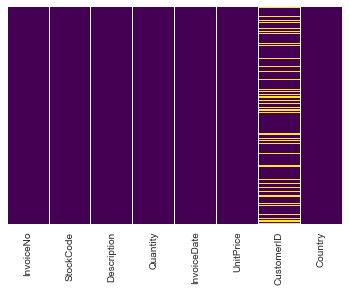

In [60]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
df[df['CustomerID'].isnull()==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [62]:
Main1=df[df['CustomerID'].isnull()==False].head(400055)

In [63]:
Main1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [64]:
Main1.StockCode.nunique()

3683

In [65]:
Main1.CustomerID.nunique()

4357

In [66]:
Main1[Main1['CustomerID']==17850].StockCode.nunique()

24

In [67]:
StockCode=Main1.StockCode.unique()

In [68]:
len(StockCode)

3683

In [69]:
CustomerID=Main1.CustomerID.unique()

In [70]:
len(CustomerID)

4357

In [71]:
model=[]

In [72]:
len(model)

0

In [73]:
for i in range (0,2581):
    model.append('Integra        ')
    model.append('TL             ')
    model.append('CL             ')
    model.append('RL             ')
    model.append('A4             ')
    model.append('A6             ')
    model.append('A8             ')
    model.append('323i           ')
    model.append('328i           ')
    model.append('528i           ')
    model.append('Century        ')
    model.append('Regal          ')
    model.append('Park Avenue    ')
    model.append('LeSabre        ')
    model.append('DeVille        ')
    model.append('Seville        ')
    model.append('Eldorado       ')
    model.append('Catera         ')
    model.append('Escalade       ')
    model.append('Cavalier       ')
    model.append('Malibu         ')
    model.append('Lumina         ')
    model.append('Monte Carlo    ')
    model.append('Camaro         ')
    model.append('Corvette       ')
    model.append('Prizm          ')
    model.append('Metro          ')
    model.append('Impala         ')
    model.append('Sebring Coupe  ')
    model.append('Sebring Conv.  ')
    model.append('Concorde       ')
    model.append('Cirrus         ')
    model.append('LHS            ')
    model.append('Town & Country ')
    model.append('300M           ')
    model.append('Neon           ')
    model.append('Avenger        ')
    model.append('Stratus        ')
    model.append('Intrepid       ')
    model.append('Viper          ')
    model.append('Ram Pickup     ')
    model.append('Ram Wagon      ')
    model.append('Ram Van        ')
    model.append('Dakota         ')
    model.append('Durango        ')
    model.append('Caravan        ')
    model.append('Escort         ')
    model.append('Mustang        ')
    model.append('Contour        ')
    model.append('Taurus         ')
    model.append('Focus          ')
    model.append('Crown Victoria ')
    model.append('Explorer       ')
    model.append('Windstar       ')
    model.append('Expedition     ')
    model.append('Ranger         ')
    model.append('F-Series       ')
    model.append('Civic          ')
    model.append('Accord         ')
    model.append('CR-V           ')
    model.append('Passport       ')
    model.append('Odyssey        ')
    model.append('Accent         ')
    model.append('Elantra        ')
    model.append('Sonata         ')
    model.append('I30            ')
    model.append('S-Type         ')
    model.append('Wrangler       ')
    model.append('Cherokee       ')
    model.append('Grand Cherokee ')
    model.append('ES300          ')
    model.append('GS300          ')
    model.append('GS400          ')
    model.append('LS400          ')
    model.append('LX470          ')
    model.append('RX300          ')
    model.append('Continental    ')
    model.append('Town car       ')
    model.append('Navigator      ')
    model.append('Mirage         ')
    model.append('Eclipse        ')
    model.append('Galant         ')
    model.append('Diamante       ')
    model.append('3000GT         ')
    model.append('Montero        ')
    model.append('Montero Sport  ')
    model.append('Mystique       ')
    model.append('Cougar         ')
    model.append('Sable          ')
    model.append('Grand Marquis  ')
    model.append('Mountaineer    ')
    model.append('Villager       ')
    model.append('C-Class        ')
    model.append('E-Class        ')
    model.append('S-Class        ')
    model.append('SL-Class       ')
    model.append('SLK            ')
    model.append('SLK230         ')
    model.append('CLK Coupe      ')
    model.append('CL500          ')
    model.append('M-Class        ')
    model.append('Sentra         ')
    model.append('Altima         ')
    model.append('Maxima         ')
    model.append('Quest          ')
    model.append('Pathfinder     ')
    model.append('Xterra         ')
    model.append('Frontier       ')
    model.append('Cutlass        ')
    model.append('Intrigue       ')
    model.append('Alero          ')
    model.append('Aurora         ')
    model.append('Bravada        ')
    model.append('Silhouette     ')
    model.append('Neon           ')
    model.append('Breeze         ')
    model.append('Voyager        ')
    model.append('Prowler        ')
    model.append('Sunfire        ')
    model.append('Grand Am       ')
    model.append('Firebird       ')
    model.append('Grand Prix     ')
    model.append('Bonneville     ')
    model.append('Montana        ')
    model.append('Boxter         ')
    model.append('Carrera Coupe  ')
    model.append('Carrera Cabrio ')
    model.append('SL             ')
    model.append('SC             ')
    model.append('SW             ')
    model.append('LW             ')
    model.append('LS             ')
    model.append('Outback        ')
    model.append('Forester       ')
    model.append('Corolla        ')
    model.append('Camry          ')
    model.append('Avalon         ')
    model.append('Celica         ')
    model.append('Tacoma         ')
    model.append('Sienna         ')
    model.append('RAV4           ')
    model.append('4Runner        ')
    model.append('Land Cruiser   ')
    model.append('Golf           ')
    model.append('Jetta          ')
    model.append('Passat         ')
    model.append('Cabrio         ')
    model.append('GTI            ')
    model.append('Beetle         ')
    model.append('S40            ')
    model.append('V40            ')
    model.append('S70            ')
    model.append('V70            ')
    model.append('C70            ')
    model.append('S80            ')
    

In [74]:
Main1['model']=model

In [75]:
Main1.model.nunique()

154

In [76]:
Main1.count()

InvoiceNo      400055
StockCode      400055
Description    400055
Quantity       400055
InvoiceDate    400055
UnitPrice      400055
CustomerID     400055
Country        400055
model          400055
dtype: int64

In [77]:
Main1.drop(columns=['UnitPrice','StockCode','Description'],axis=1,inplace=True)

In [78]:
Main1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [79]:
Main1['InvoiceDate'] = pd.to_datetime(Main1['InvoiceDate'], format="%m/%d/%Y %H:%M").dt.date

In [80]:
convert_dict = { 
                'CustomerID': int
               } 

In [81]:
Main1 = Main1.astype(convert_dict) 
print(Main1.dtypes)

InvoiceNo      object
Quantity        int64
InvoiceDate    object
CustomerID      int32
Country        object
model          object
dtype: object


In [82]:
Main1.head()

,InvoiceNo,Quantity,InvoiceDate,CustomerID,Country,model
0,536365,6,2010-12-01,17850,United Kingdom,Integra
1,536365,6,2010-12-01,17850,United Kingdom,TL
2,536365,8,2010-12-01,17850,United Kingdom,CL
3,536365,6,2010-12-01,17850,United Kingdom,RL
4,536365,6,2010-12-01,17850,United Kingdom,A4


In [83]:
Main1.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [84]:
Main1[Main1.Quantity>15].Quantity=25

In [85]:
def meaningfulQty(x):
    if x > 15:
        return 25
    elif x< 0:
        return 1
    else:
        return x

In [86]:
Main1['Quantity'] = Main1['Quantity'].apply(lambda x: meaningfulQty(x))

In [87]:
Main1.Quantity.unique()

array([ 6,  8,  2, 25,  3,  4, 12, 10,  5,  1,  9,  7, 14, 11, 13, 15],
      dtype=int64)

In [88]:
Main1.head(50)

,InvoiceNo,Quantity,InvoiceDate,CustomerID,Country,model
0,536365,6,2010-12-01,17850,United Kingdom,Integra
1,536365,6,2010-12-01,17850,United Kingdom,TL
2,536365,8,2010-12-01,17850,United Kingdom,CL
3,536365,6,2010-12-01,17850,United Kingdom,RL
4,536365,6,2010-12-01,17850,United Kingdom,A4
5,536365,2,2010-12-01,17850,United Kingdom,A6
6,536365,6,2010-12-01,17850,United Kingdom,A8
7,536366,6,2010-12-01,17850,United Kingdom,323i
8,536366,6,2010-12-01,17850,United Kingdom,328i
9,536367,25,2010-12-01,13047,United Kingdom,528i


In [89]:
Unit_Price = []

In [90]:
for i in range (0,2581):
    Unit_Price.append(21.5)
    Unit_Price.append(28.4)
    Unit_Price.append(20.0)
    Unit_Price.append(42.0)
    Unit_Price.append(23.9)
    Unit_Price.append(33.9)
    Unit_Price.append(62.0)
    Unit_Price.append(26.9)
    Unit_Price.append(33.4)
    Unit_Price.append(38.9)
    Unit_Price.append(21.9)
    Unit_Price.append(25.3)
    Unit_Price.append(31.9)
    Unit_Price.append(27.8)
    Unit_Price.append(39.8)
    Unit_Price.append(44.4)
    Unit_Price.append(39.6)
    Unit_Price.append(31.0)
    Unit_Price.append(46.2)
    Unit_Price.append(13.2)
    Unit_Price.append(16.5)
    Unit_Price.append(18.8)
    Unit_Price.append(19.3)
    Unit_Price.append(24.3)
    Unit_Price.append(45.7)
    Unit_Price.append(13.9)
    Unit_Price.append(9.23)
    Unit_Price.append(18.8)
    Unit_Price.append(19.8)
    Unit_Price.append(24.4)
    Unit_Price.append(22.2)
    Unit_Price.append(16.4)
    Unit_Price.append(28.3)
    Unit_Price.append(20.0)
    Unit_Price.append(29.1)
    Unit_Price.append(12.6)
    Unit_Price.append(19.0)
    Unit_Price.append(20.2)
    Unit_Price.append(22.5)
    Unit_Price.append(69.7)
    Unit_Price.append(19.4)
    Unit_Price.append(21.3)
    Unit_Price.append(18.5)
    Unit_Price.append(16.9)
    Unit_Price.append(26.3)
    Unit_Price.append(19.5)
    Unit_Price.append(12.0)
    Unit_Price.append(21.5)
    Unit_Price.append(17.0)
    Unit_Price.append(17.8)
    Unit_Price.append(12.3)
    Unit_Price.append(22.1)
    Unit_Price.append(31.9)
    Unit_Price.append(21.4)
    Unit_Price.append(36.1)
    Unit_Price.append(12.0)
    Unit_Price.append(26.9)
    Unit_Price.append(12.8)
    Unit_Price.append(15.3)
    Unit_Price.append(20.5)
    Unit_Price.append(26.6)
    Unit_Price.append(26.0)
    Unit_Price.append(9.69)
    Unit_Price.append(11.7)
    Unit_Price.append(14.9)
    Unit_Price.append(29.4)
    Unit_Price.append(42.8)
    Unit_Price.append(14.4)
    Unit_Price.append(21.6)
    Unit_Price.append(26.8)
    Unit_Price.append(31.5)
    Unit_Price.append(37.8)
    Unit_Price.append(46.3)
    Unit_Price.append(54.0)
    Unit_Price.append(60.1)
    Unit_Price.append(34.6)
    Unit_Price.append(39.0)
    Unit_Price.append(43.3)
    Unit_Price.append(42.6)
    Unit_Price.append(13.9)
    Unit_Price.append(19.0)
    Unit_Price.append(17.3)
    Unit_Price.append(24.9)
    Unit_Price.append(25.4)
    Unit_Price.append(31.8)
    Unit_Price.append(22.5)
    Unit_Price.append(16.2)
    Unit_Price.append(16.5)
    Unit_Price.append(19.0)
    Unit_Price.append(22.6)
    Unit_Price.append(27.5)
    Unit_Price.append(22.5)
    Unit_Price.append(31.7)
    Unit_Price.append(49.9)
    Unit_Price.append(69.7)
    Unit_Price.append(82.6)
    Unit_Price.append(38.9)
    Unit_Price.append(41.0)
    Unit_Price.append(41.6)
    Unit_Price.append(85.5)
    Unit_Price.append(35.3)
    Unit_Price.append(13.4)
    Unit_Price.append(20.3)
    Unit_Price.append(26.2)
    Unit_Price.append(26.3)
    Unit_Price.append(29.2)
    Unit_Price.append(22.7)
    Unit_Price.append(17.8)
    Unit_Price.append(18.1)
    Unit_Price.append(24.1)
    Unit_Price.append(18.2)
    Unit_Price.append(36.2)
    Unit_Price.append(31.5)
    Unit_Price.append(25.3)
    Unit_Price.append(12.6)
    Unit_Price.append(16.0)
    Unit_Price.append(18.8)
    Unit_Price.append(43.0)
    Unit_Price.append(21.6)
    Unit_Price.append(19.7)
    Unit_Price.append(25.3)
    Unit_Price.append(21.6)
    Unit_Price.append(23.7)
    Unit_Price.append(25.6)
    Unit_Price.append(41.4)
    Unit_Price.append(71.0)
    Unit_Price.append(74.9)
    Unit_Price.append(10.6)
    Unit_Price.append(12.5)
    Unit_Price.append(14.2)
    Unit_Price.append(18.8)
    Unit_Price.append(15.0)
    Unit_Price.append(22.6)
    Unit_Price.append(20.0)
    Unit_Price.append(13.1)
    Unit_Price.append(17.5)
    Unit_Price.append(25.5)
    Unit_Price.append(16.8)
    Unit_Price.append(11.5)
    Unit_Price.append(22.3)
    Unit_Price.append(16.8)
    Unit_Price.append(22.2)
    Unit_Price.append(51.7)
    Unit_Price.append(14.9)
    Unit_Price.append(16.7)
    Unit_Price.append(21.2)
    Unit_Price.append(19.9)
    Unit_Price.append(17.5)
    Unit_Price.append(15.9)
    Unit_Price.append(23.4)
    Unit_Price.append(24.4)
    Unit_Price.append(27.5)
    Unit_Price.append(28.8)
    Unit_Price.append(45.5)
    Unit_Price.append(36.0)

In [91]:
len(Unit_Price)

400055

In [92]:
Main1['Unit_Price'] = Unit_Price

In [93]:
Main1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400055 entries, 0 to 530911
Data columns (total 7 columns):
InvoiceNo      400055 non-null object
Quantity       400055 non-null int64
InvoiceDate    400055 non-null object
CustomerID     400055 non-null int32
Country        400055 non-null object
model          400055 non-null object
Unit_Price     400055 non-null float64
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 22.9+ MB


In [94]:
#Main1.to_csv('../data/output/Main1.csv')

In [95]:
car_sales= pd.read_csv('../data/input/Car_sales.csv')

In [96]:

Main1['model'] = Main1['model'].str.rstrip()

In [97]:
Main1.describe()

,Quantity,CustomerID,Unit_Price
count,400055.000000,400055.000000,400055.000000
mean,8.259137,15287.077819,27.225290
std,8.199656,1713.466947,14.332719
min,1.000000,12346.000000,9.230000
25%,2.000000,13952.000000,17.800000
50%,5.000000,15152.000000,22.600000
75%,12.000000,16791.000000,31.900000
max,25.000000,18287.000000,85.500000


In [98]:
merged = pd.merge(left=Main1, right=car_sales, left_on='model', right_on='Model')
merged

,InvoiceNo,Quantity,InvoiceDate,CustomerID,Country,model,Unit_Price,Manufacturer,Model,Sales_in_thousands,...,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Path
0,536365,6,2010-12-01,17850,United Kingdom,Integra,21.5,Acura,Integra,16.919,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
1,536384,3,2010-12-01,18074,United Kingdom,Integra,21.5,Acura,Integra,16.919,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
2,536398,4,2010-12-01,13448,United Kingdom,Integra,21.5,Acura,Integra,16.919,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
3,536408,4,2010-12-01,14307,United Kingdom,Integra,21.5,Acura,Integra,16.919,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
4,536412,1,2010-12-01,17920,United Kingdom,Integra,21.5,Acura,Integra,16.919,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400050,580833,2,2011-12-06,16764,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400051,580865,12,2011-12-06,17914,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400052,580876,2,2011-12-06,14071,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400053,580880,10,2011-12-06,14121,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg


In [99]:
merged.isnull().sum()

InvoiceNo                  0
Quantity                   0
InvoiceDate                0
CustomerID                 0
Country                    0
model                      0
Unit_Price                 0
Manufacturer               0
Model                      0
Sales_in_thousands         0
__year_resale_value    87754
Vehicle_type               0
Price_in_thousands      5162
Engine_size             2581
Horsepower              2581
Wheelbase               2581
Width                   2581
Length                  2581
Curb_weight             5162
Fuel_capacity           2581
Fuel_efficiency         7743
Latest_Launch              0
Power_perf_factor       5162
Path                       0
dtype: int64

In [100]:
merged.tail(1000)

,InvoiceNo,Quantity,InvoiceDate,CustomerID,Country,model,Unit_Price,Manufacturer,Model,Sales_in_thousands,...,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Path
399055,566431,25,2011-09-12,18180,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg
399056,566443,12,2011-09-12,17071,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg
399057,566451,1,2011-09-12,18069,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg
399058,566477,4,2011-09-13,14359,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg
399059,566486,6,2011-09-13,16098,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400050,580833,2,2011-12-06,16764,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg
400051,580865,12,2011-12-06,17914,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg
400052,580876,2,2011-12-06,14071,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg
400053,580880,10,2011-12-06,14121,United Kingdom,S80,36.0,Volvo,S80,18.969,...,201.0,109.9,72.1,189.8,3.6,21.1,24.0,11/14/2011,85.735655,10.jpg


In [101]:
Main=merged

In [102]:
Main.drop(columns=(['Price_in_thousands','Model']),axis=1)

,InvoiceNo,Quantity,InvoiceDate,CustomerID,Country,model,Unit_Price,Manufacturer,Sales_in_thousands,__year_resale_value,...,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Path
0,536365,6,2010-12-01,17850,United Kingdom,Integra,21.5,Acura,16.919,16.36,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
1,536384,3,2010-12-01,18074,United Kingdom,Integra,21.5,Acura,16.919,16.36,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
2,536398,4,2010-12-01,13448,United Kingdom,Integra,21.5,Acura,16.919,16.36,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
3,536408,4,2010-12-01,14307,United Kingdom,Integra,21.5,Acura,16.919,16.36,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
4,536412,1,2010-12-01,17920,United Kingdom,Integra,21.5,Acura,16.919,16.36,...,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,1.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400050,580833,2,2011-12-06,16764,United Kingdom,S80,36.0,Volvo,18.969,NaN,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400051,580865,12,2011-12-06,17914,United Kingdom,S80,36.0,Volvo,18.969,NaN,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400052,580876,2,2011-12-06,14071,United Kingdom,S80,36.0,Volvo,18.969,NaN,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg
400053,580880,10,2011-12-06,14121,United Kingdom,S80,36.0,Volvo,18.969,NaN,...,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655,10.jpg


In [103]:
Main.to_csv('../data/output/Main.csv')

In [104]:

User_Details = pd.DataFrame(Main['CustomerID'].unique())


In [105]:
User_Details.columns = ['CustomerID']

In [106]:
User_Details_recent_purchase = Main.groupby('CustomerID').InvoiceDate.max().reset_index()

In [107]:
User_Details_recent_purchase.columns = ['CustomerID','Recent_Purchase_Date']

In [108]:
User_Details_recent_purchase

,CustomerID,Recent_Purchase_Date
0,12346,2011-01-18
1,12347,2011-10-31
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02
...,...,...
4352,18280,2011-03-07
4353,18281,2011-06-12
4354,18282,2011-12-02
4355,18283,2011-12-06


In [109]:
User_Details_recent_purchase['Recency'] = (User_Details_recent_purchase['Recent_Purchase_Date'].max() - User_Details_recent_purchase['Recent_Purchase_Date']).dt.days

User_Details = pd.merge(User_Details, User_Details_recent_purchase[['CustomerID','Recency']], on='CustomerID')

In [110]:
User_Details.head(50)

,CustomerID,Recency
0,17850,299
1,18074,370
2,13448,13
3,14307,85
4,17920,1
5,14849,18
6,17377,20
7,17572,68
8,12433,6
9,15165,370


In [111]:
User_Details.describe()

,CustomerID,Recency
count,4357.000000,4357.000000
mean,15302.485885,91.394078
std,1722.902576,100.277272
min,12346.000000,0.000000
25%,13814.000000,16.000000
50%,15304.000000,48.000000
75%,16782.000000,144.000000
max,18287.000000,370.000000


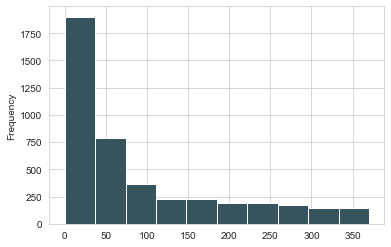

In [112]:
User_Details['Recency'].plot.hist( alpha=1,bins=10,)

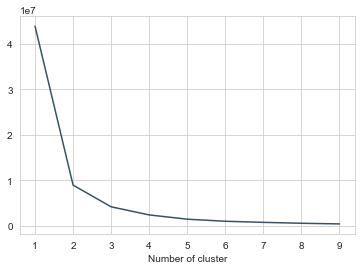

In [113]:
from sklearn.cluster import KMeans

sse={}
User_recency = User_Details[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=500).fit(User_recency)
    User_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [114]:

kmeans = KMeans(n_clusters=4)
kmeans.fit(User_Details[['Recency']])
User_Details['RecencyCluster'] = kmeans.predict(User_Details[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

User_Details = order_cluster('RecencyCluster', 'Recency',User_Details,False)

In [115]:
User_Details.groupby('RecencyCluster')['RecencyCluster'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,620.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,955.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,2269.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0


In [116]:
User_frequency = Main.groupby('CustomerID').InvoiceDate.count().reset_index()
User_frequency.columns = ['CustomerID','Frequency']

User_Details = pd.merge(User_Details, User_frequency, on='CustomerID')

In [117]:
User_Details

,CustomerID,Recency,RecencyCluster,Frequency
0,17850,299,0,312
1,18074,370,0,13
2,15165,370,0,27
3,16274,370,0,67
4,13715,278,0,108
...,...,...,...,...
4352,16344,155,1,2
4353,16338,154,1,11
4354,15042,196,1,5
4355,14340,215,1,6


In [118]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(User_Details[['Frequency']])
User_Details['FrequencyCluster'] = kmeans.predict(User_Details[['Frequency']])

User_Details = order_cluster('FrequencyCluster', 'Frequency',User_Details,True)

User_Details.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3859.0,49.628401,44.777803,1.0,15.00,33.0,72.50,188.0
1,470.0,326.961702,131.182122,189.0,227.25,284.5,392.00,803.0
2,24.0,1327.708333,489.773193,872.0,980.75,1114.5,1538.25,2681.0
3,4.0,5750.500000,1356.713308,4543.0,4981.75,5396.5,6165.25,7666.0


In [119]:
Main['Revenue'] = Main['Unit_Price'] * Main['Quantity']
User_revenue = Main.groupby('CustomerID').Revenue.sum().reset_index()

User_Details = pd.merge(User_Details, User_revenue, on='CustomerID')

In [120]:

User_Details

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850,299,0,312,1,48363.22
1,15808,303,0,210,1,37687.99
2,13448,13,3,199,1,44065.84
3,17920,1,3,696,1,62540.26
4,14849,18,3,392,1,157358.88
...,...,...,...,...,...,...
4352,15555,9,3,925,2,126111.28
4353,15719,29,3,938,2,74944.08
4354,14456,2,3,977,2,72649.61
4355,16549,7,3,981,2,63172.62


In [121]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(User_Details[['Revenue']])
User_Details['RevenueCluster'] = kmeans.predict(User_Details[['Revenue']])

User_Details = order_cluster('RevenueCluster', 'Revenue',User_Details,True)

User_Details.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3968.0,1.197457e+04,11676.682186,13.20,3.358725e+03,7756.870,1.681177e+04,50538.33
1,375.0,8.931222e+04,41975.338890,50750.49,5.881386e+04,74453.840,1.038559e+05,275284.10
2,12.0,5.195670e+05,159182.069572,309951.61,4.416037e+05,488969.765,5.417401e+05,908855.05
3,2.0,1.419319e+06,320089.555103,1192981.65,1.306150e+06,1419319.145,1.532488e+06,1645656.64


In [122]:
import math
millnames = ['',' K',' M',' B',' T']
def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))
    return '${:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [123]:
User_Details['Revenue'] = User_Details['Revenue'].apply(lambda x: millify(x))

In [124]:


User_Details['OverallScore'] = User_Details['RecencyCluster'] + User_Details['FrequencyCluster'] + User_Details['RevenueCluster']


In [125]:
User_Details

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,17850,299,0,312,1,$48 K,0,1
1,15808,303,0,210,1,$38 K,0,1
2,13448,13,3,199,1,$44 K,0,4
3,14388,5,3,191,1,$50 K,0,4
4,14449,15,3,258,1,$21 K,0,4
...,...,...,...,...,...,...,...,...
4352,13089,1,3,1855,2,$717 K,2,7
4353,13081,8,3,1059,2,$443 K,2,7
4354,14156,6,3,1420,2,$521 K,2,7
4355,14911,1,3,5665,3,$2 M,3,9


In [126]:
User_Details[User_Details['OverallScore']==9]

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
4355,14911,1,3,5665,3,$2 M,3,9


In [127]:
User_Details.to_csv('../data/output/User_Details.csv')

In [128]:
df_U = User_Details
df_U

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,17850,299,0,312,1,$48 K,0,1
1,15808,303,0,210,1,$38 K,0,1
2,13448,13,3,199,1,$44 K,0,4
3,14388,5,3,191,1,$50 K,0,4
4,14449,15,3,258,1,$21 K,0,4
...,...,...,...,...,...,...,...,...
4352,13089,1,3,1855,2,$717 K,2,7
4353,13081,8,3,1059,2,$443 K,2,7
4354,14156,6,3,1420,2,$521 K,2,7
4355,14911,1,3,5665,3,$2 M,3,9


In [129]:
ass = df_U.loc[df_U['CustomerID']==14449,['OverallScore']]
ass.values

array([[4]], dtype=int64)

In [130]:
df_U[df_U['CustomerID']==14449]['OverallScore']

4    4
Name: OverallScore, dtype: int64

In [131]:
#User_Details.to_csv('User_Details.csv')
import pickle
pickle.dump(User_Details, open('../pickle/User_Details.pkl','wb'))

In [132]:
#Computes the most popular items
item_popularity_df = Main.groupby('model')['Quantity'].sum().sort_values(ascending=False).reset_index()
item_popularity_df.head(200)

,model,Quantity
0,Neon,43153
1,Corvette,22422
2,Monte Carlo,22087
3,Viper,22074
4,C-Class,21996
...,...,...
149,Celica,20692
150,Passport,20667
151,Contour,20612
152,Avalon,20567


In [133]:
#Computes the most popular items
model_count = Main.groupby('model')['Quantity'].count().sort_values(ascending=False).reset_index()
model_count.head(200)

,model,Quantity
0,Neon,5162
1,Xterra,2581
2,Dakota,2581
3,Eclipse,2581
4,ES300,2581
...,...,...
149,Mystique,2581
150,Mustang,2581
151,Mountaineer,2581
152,Montero Sport,2581


In [134]:
#class PopularityRecommender:
#    
#    MODEL_NAME = 'Popularity'
#    
#    def __init__(self, popularity_df, items_df=None):
#        self.popularity_df = popularity_df
#        self.items_df = items_df
#        
#    def get_model_name(self):
#        return self.MODEL_NAME
#        
#    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
#        # Recommend the more popular items that the user hasn't seen yet.
#        recommendations_df = self.popularity_df[~self.popularity_df['model'].isin(items_to_ignore)] \
#                               .sort_values('Quantity', ascending = False) \
#                               .head(topn)
#
#        if verbose:
#            if self.items_df is None:
#                raise Exception('"items_df" is required in verbose mode')
#
#            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
#                                                          left_on = 'model', 
#                                                          right_on = 'model')[['Quantity', 'model', 'Unit_Price']]
#
#
#        return recommendations_df
#    
#
#

In [135]:
#popularity_model = PopularityRecommender(item_popularity_df, Main) 

In [136]:
#print('Evaluating Popularity recommendation model...')
#pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(popularity_model)
#print('\nGlobal metrics:\n%s' % pop_global_metrics)
#pop_detailed_results_df.head(10)